<a href="https://colab.research.google.com/github/thisisHHP/CIFAR10-CNN/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
!nvidia-smi

Thu Mar  9 18:23:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train, y_test

(array([6, 9, 9, ..., 9, 1, 1], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

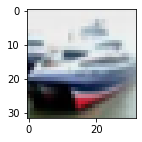

In [ ]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[1])

In [ ]:
# Normalize the dataset
X_train = X_train / 255
X_test = y_test / 255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
#CNN
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = 'softmax')

])

In [ ]:
cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5575 - accuracy: 0.4380
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3030 - accuracy: 0.5369
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1908 - accuracy: 0.5787
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1180 - accuracy: 0.6050
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0597 - accuracy: 0.6256
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0219 - accuracy: 0.6406
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9851 - accuracy: 0.6544
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9524 - accuracy: 0.6646
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9254 - accuracy: 0.6739
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.90